> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate The TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDb data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In this analysis report we're going to analyze the data to benifit from the information we gathered.

#### There are some questions to be answered in this report;
##### What is the highiest and lowest profit generated?
#####  What is the highiest and lowest Revenue?
#####  What is the Most popular and least popular movies?
#####  What are the Most popular Genres?

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pprint 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.info()


## In the results below we notice that there are few missing data from the database that needs to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## In the results below we notice that there are few missing data from the database that needs to be fixed

In [4]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


A sample of the data that is displayed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D7CCF7400>,
      dtype=object)

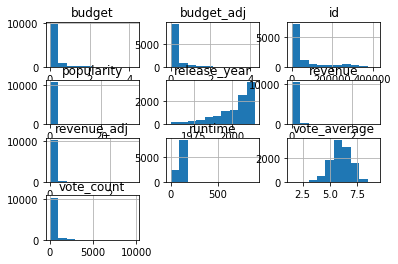

In [5]:
df = pd.read_csv('tmdb-movies.csv')
df.hist()

A histogram that displays a general graph about the data

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning By Dropping The Rows With Missing Data

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Identefying the null values(missing values) in the dataset

In [7]:
df.dropna(inplace=True)

dropping the null values since they're not sufficent at this point

In [8]:
df.isnull().sum().any()

False

checking if there are any null values(should display false)

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

double checking if the nulls are gone

### Data Cleaning By Dropping The Rows With Duplicated Data

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
sum(df.duplicated())

0

In the previous two cells we checked for duplicates and dropped them. The sum should be 0

### Data Cleaning By Dropping unused rows

In [12]:
#creating a list of columb to be deleted
del_col=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
df= df.drop(del_col,1)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


These are the cells that are not going to be used in our analysis

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What is the highiest and lowest profit generated?

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.insert(3,'profit_earned',df['revenue']-df['budget'])

In [14]:
df.head(2)

,popularity,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


Inserting a new column that displays the profit earned then checking the results

In [15]:
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

calculate('profit_earned')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


A calculation of the highiest and lowest profits to answer our posing question

### What is the highiest and lowest Revenue?

In [16]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
calculate('revenue')

,1386,67
popularity,9.43277,2.33164
budget,237000000,20000000
revenue,2781505847,0
profit_earned,2544505847,-20000000
original_title,Avatar,Survivor
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...
director,James Cameron,James McTeigue
tagline,Enter the World of Pandora.,His Next Target is Now Hunting Him
runtime,162,96
genres,Action|Adventure|Fantasy|Science Fiction,Crime|Thriller|Action


using the previous def we calculated the highiest and lowest revenue to answer our second posing question

### What is the Most popular and least popular movies?

In [19]:
calculate('popularity')

,0,6080
popularity,32.9858,0.00062
budget,150000000,0
revenue,1513528810,0
profit_earned,1363528810,0
original_title,Jurassic World,G.B.F.
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Michael J. Willett|Paul Iacono|Sasha Pieterse|...
director,Colin Trevorrow,Darren Stein
tagline,The park is open.,Being out has never been so in.
runtime,124,92
genres,Action|Adventure|Science Fiction|Thriller,Comedy


Like the previous question we used our calculate function to answer the question about most least popular movies.

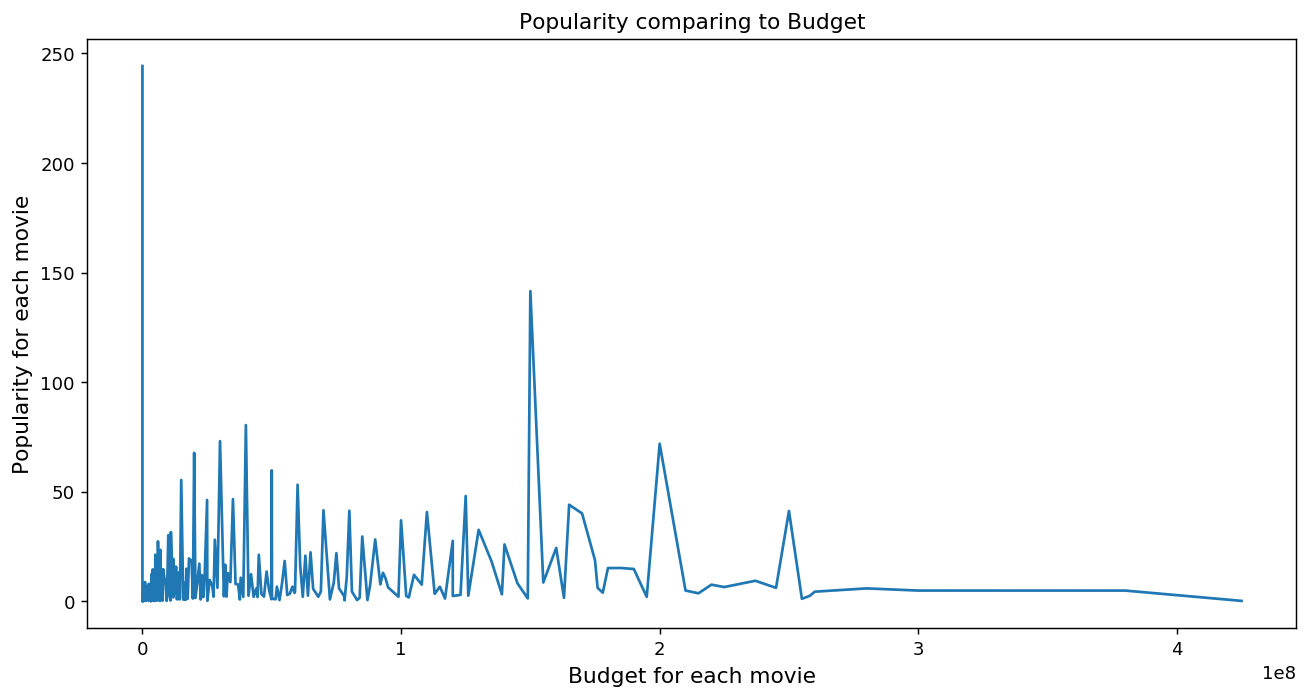

In [51]:
popularity_budget = df.groupby('budget')['popularity'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Budget for each movie', fontsize = 12)
#on y-axis
plt.ylabel('Popularity for each movie', fontsize = 12)
#title of the line plot
plt.title('Popularity comparing to Budget')

#plotting the graph
plt.plot(popularity_budget)

#displaying the line plot
plt.show()

### What are the Most popular Genres?

In [20]:
def genres(column):
    genres = df[column].str.cat(sep = '|')
    
    genres = pd.Series(genres.split('|'))
    
    count = genres.value_counts(ascending = False)
    
    return count


A function that is used to seperate the genres to be able to count it to answer the posing question

In [21]:
count = genres('genres')
count.head(20)

Drama              838
Comedy             640
Thriller           575
Action             532
Adventure          361
Science Fiction    291
Romance            291
Horror             273
Crime              262
Family             233
Fantasy            202
Animation          170
Mystery            148
Documentary         93
Music               72
History             56
War                 44
Western             20
TV Movie            16
Foreign              6
dtype: int64

As you can see from the above result Drama has the most movies with 838 and Foriegn has only 6 making it the least genre of movies.

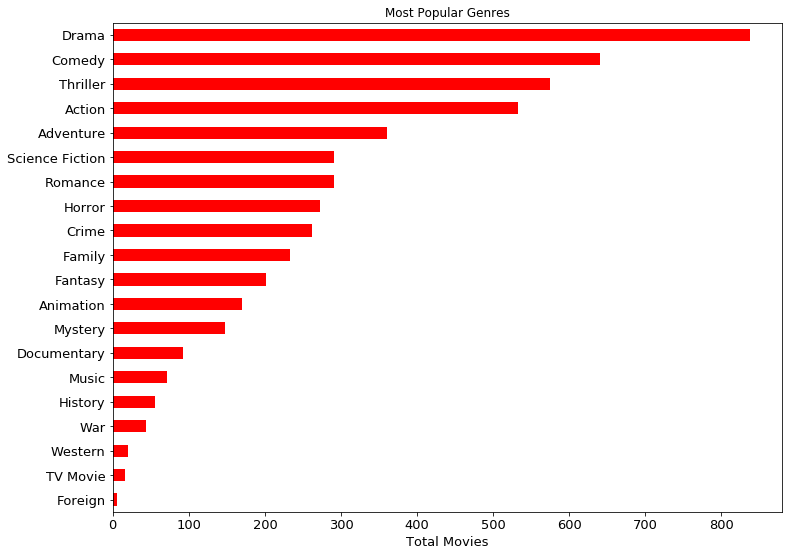

In [22]:
count.sort_values(ascending = True, inplace = True)

lt = count.plot.barh(color = '#FF0000', fontsize = 13)

lt.set(title = 'Most Popular Genres')

lt.set_xlabel('Total Movies', color = 'black', fontsize = '13')

lt.figure.set_size_inches(12, 9)
plt.show()

using matplotlib we display the data for better clearity

<a id='conclusions'></a>
## Conclusions

> Movies are one of the most entertaining things we have in our todays world and seeing how technology is being implemented in it to give us a real life experiences in our fantacies. We can see that the most popular genres till this day is drama, comedy and action. The total profits can be as high as 2544505847 or as low as losing 413912431 which is insane! But overall its good to know that in 2015 the most popular movie was 'Jurassic World' so you should probably go check it out if you havent already.

> The provided data was just helpful enough to answer the general questions that we posed, however there are still limitations to this dataset since its not giving enough data to be 100% accurate